# **06-04 자동 미분과 선형 회귀 실습**

---



선형 회귀를 tensorflow와 keras 통해 구현

## **1. 자동 미분**

---



In [ ]:
import tensorflow as tf

임의로 image.png라는 식 세우고, ***w***에 대해 미분하기

In [ ]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

tape_gradient() : 자동 미분 기능 수행

gradients 출력하여 w에 대해 미분한 값 저장된 것 확인

In [ ]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


## **2. 자동 미분을 이용한 선형 회귀 구현**

---



In [ ]:
# 학습될 가중치 변수 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

가설(Hypothesis) 정의

In [ ]:
@tf.function
def hypothesis(x):
  return w*x + b

In [ ]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


평균 제곱 오차(mse)를 손실 함수로서 정의

In [ ]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱하여 평균 취함
  return tf.reduce_mean(tf.square(y_pred - y))

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

옵티마이저(경사 하강법) 사용, 학습률 0.01

In [ ]:
optimizer = tf.optimizers.SGD(0.01)

300번에 걸쳐 경사 하강법 수행

In [ ]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 입력 x에 대한 예측값
    y_pred = hypothesis(x)

    # mse 계산
    cost = mse_loss(y_pred, y)

  # loss 함수에 대한 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # update
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

w, b값이 변경됨에 따라 cost 계속 줄어듦

In [ ]:
# 학습된 w,b 값에 대한 예측값 확인
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


## **3. 케라스로 구현하는 선형 회귀**

---



첫 번째 인자 "1" : 출력 차원 (output_dim)

두 번째 인자 input_dim : 입력 차원 (단순 선형 회귀 구현하는 경우, 1)

In [ ]:
# 예시 코드 (실행 불가)
model = Sequential()
model.add(keras.layers.Dense(1, input_dim=1))

실습

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부한 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부한 시간에 대한 성적

model = Sequential()

# output_dim(출력 차원 y): 1, input_dim(입력 차원 x): 1
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd: 경사 하강법, lr: 학습률(learning rate)
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function): 평균제곱오차 mse 사용
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 오차를 최소화하는 작업 300번 시도
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 322ms/step - loss: 4593.1758 - mse: 4593.1758
Epoch 2/300
1/1 [==============================] - 0s 12ms/step - loss: 566.2913 - mse: 566.2913
Epoch 3/300
1/1 [==============================] - 0s 9ms/step - loss: 70.8117 - mse: 70.8117
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 9.8449 - mse: 9.8449
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 2.3418 - mse: 2.3418
Epoch 6/300
1/1 [==============================] - 0s 13ms/step - loss: 1.4169 - mse: 1.4169
Epoch 7/300
1/1 [==============================] - 0s 16ms/step - loss: 1.3015 - mse: 1.3015
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 1.2857 - mse: 1.2857
Epoch 9/300
1/1 [==============================] - 0s 12ms/step - loss: 1.2821 - mse: 1.2821
Epoch 10/300
1/1 [==============================] - 0s 11ms/step - loss: 1.2801 - mse: 1.2801
Epoch 11/300
1/1 [==============================] - 0s 9ms

검은색 점(k.) : 주어진 실제값

파란색 직선(b) : 오차를 최소화하는 w, b 값을 가진 직선

1/1 [==============================] - 0s 61ms/step


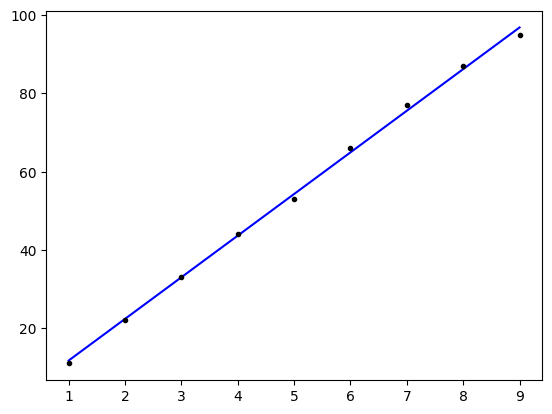

In [5]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

9시간 30분 공부했을 때의 시험 성적 예측

In [6]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 59ms/step
[[102.13984]]
